In [223]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# ЧТЕНИЕ И ЗАПИСЬ DF


In [224]:
df = pd.read_excel('pandas_tutorial.xlsx')  # считать файл excel, header - наименование колонок
# можно также csv, файл и тд
# df.to_excel('pandas_tutorial.xlsx')   перевести в файл excel

In [225]:
df.to_pickle('pandas_tutorial.pickle')  # первести в формат pickle
# можно переводить в любой формат

In [226]:
df1 = pd.DataFrame.from_dict({'a':[1, 2], 'b':[3, 4]})  # создание DataFrame
df1

,a,b
0,1,3
1,2,4


In [227]:
df.info(memory_usage='deep')  # memory_usage - количество использованной памяти
df.shape # количество (строки, колонки)
df.columns  # все названия колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 322.0 KB


Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [228]:
df.head(5)  # первые 5 строчек из df
df.tail(5)  # последние 5 строчек из df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [229]:
df.dtypes  # какой тип данных соответствует какой колонке

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# ОДНОМЕРНЫЕ ДАННЫЕ В `SERIES`

In [230]:
df[['Name', 'Sex']]  # колонка name и sex из df - серия
type(df['Name'])

pandas.core.series.Series

In [231]:
df['Name'].shape  # - число строк в столбце name

(891,)

In [232]:
df.iloc[[5, 10, 15], [0, 1]]  # - рабоает по номеру колонки
df.loc[[5, 10, 15], ['Name', 'Age']]  # - рабоает по названию колонки
# срезает значения из таблицы

,Name,Age
5,"Moran, Mr. James",NaN
10,"Sandstrom, Miss. Marguerite Rut",4.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0


In [233]:
df['Age'] > 18  # - проверяет условие в определенной колонке

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [234]:
df[df['Age'].isin([5, 10, 15])]  # вернет только колонки age со значениями 5, 10, 15

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
58,58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
233,233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
352,352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
419,419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
448,448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
689,689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
777,777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
819,819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
830,830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C


In [235]:
df[(df['Age'] == 5) | (df['Age'] == 10)]  # - тот же isin()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
233,233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
419,419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
448,448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
777,777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
819,819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S


In [236]:
df['Age'].notna() # проверка not a number (True - число)
df['Age'].isna()  # проверка is number (True - не число)


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [237]:
df.loc[df['Age'].notna(), 'Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 714, dtype: object

In [238]:
df.sort_values('Age').head(10)  # - сортировка

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


In [239]:
df.sort_values(['Age', 'Name'], ascending=[False, True]).head(10)
# сортирует данные в приоритете age > name

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
745,745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
672,672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
33,33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
280,280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S


In [240]:
df2 = df.copy(deep=True)  # глубокое копирование БД

In [241]:
cdf1 = pd.concat([df, df2], axis=1)  # объединение двух БД
# axis=0 - слияние по строчкам
# axis=1 - слияние по столбцам

In [242]:
pd.merge(df, df2, how='inner')  # умнее чем concat
# не должно быть повторения колонок

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [243]:
df['Age'].count  # - количество полезных строчек (не None)

<bound method Series.count of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [244]:
df['Age'].mean(), df['Age'].median()
# среднее арифметическое, медиана

(29.69911764705882, 28.0)

In [245]:
df['Age'].describe()  # полное описание

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# ГРАФИКИ

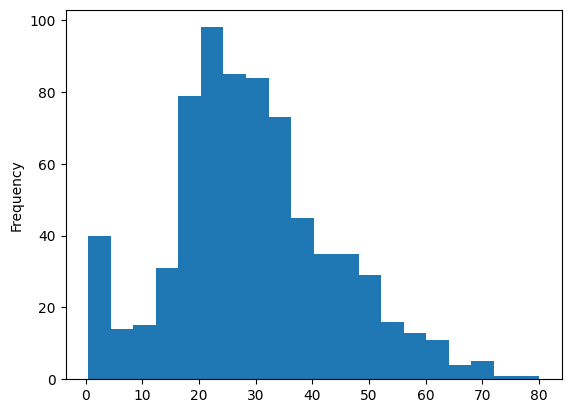

In [246]:
df['Age'].plot(kind='hist', bins=20);
# bins - количество столбцов
# kind - тип графика

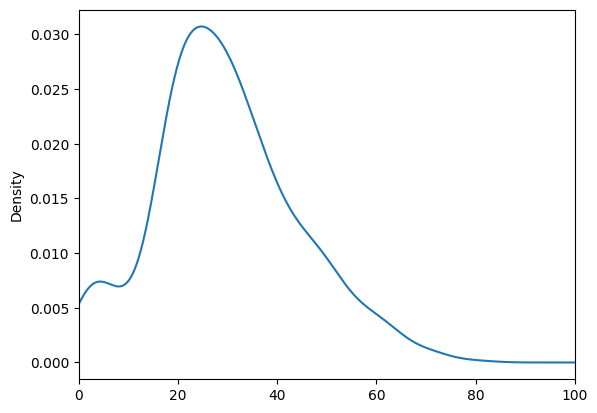

In [247]:
df['Age'].plot(kind='kde', xlim=[0, 100]);

In [248]:
df['Name'][1] = 4  # изменение определенного значения 
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12096\2593997080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][1] = 4  # изменение определенного значения


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,4,female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# `Домашняя работа`

In [249]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [250]:
# заменяем значения колонки Sex. 0, если female, 1, если male
for i, el in enumerate(df['Sex']):
    if el == 'male': df['Sex'][i] = 1
    elif el == 'female': df['Sex'][i] = 0
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12096\3228210948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if el == 'male': df['Sex'][i] = 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12096\3228210948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif el == 'female': df['Sex'][i] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12096\3228210948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif el == 'female': df['Sex'][

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [251]:
df=df.select_dtypes(include='number')  # оставляем только колонки с числовыми значениями

df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [252]:
df = df.astype(float) # приведение всех чисел к float

df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,NaN,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [253]:
# добавление новой колонки age/mean(age)
mean_age = df['Age'].mean()  # находим среднее арифметичесое всех значений колонки Age
df.insert(np.shape(df)[-1], "age_mean", [i/mean_age for i in df['Age']], True)  # добавляем колонку
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age_mean
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.740763
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.279499
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.875447
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.178486
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.178486
...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,0.909118
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.639750
888,889.0,0.0,3.0,NaN,1.0,2.0,23.4500,NaN
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.875447


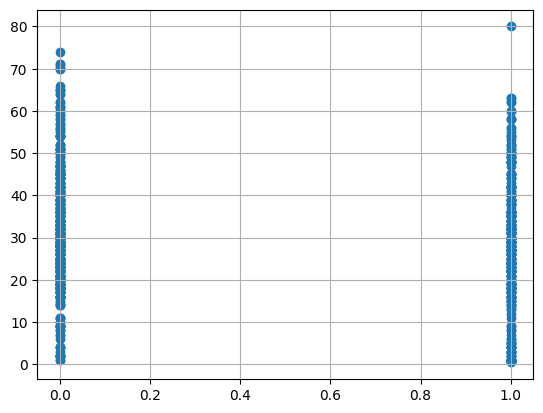

In [254]:
plt.scatter(df['Survived'], df['Age'])
plt.grid(True)

In [255]:
live = []
d = []

for i, el in enumerate(df['Survived']):
    if el: live.append(df['Age'][i])
    else: d.append(df['Age'][i])

Text(0.5, 0.98, 'Выжившие')

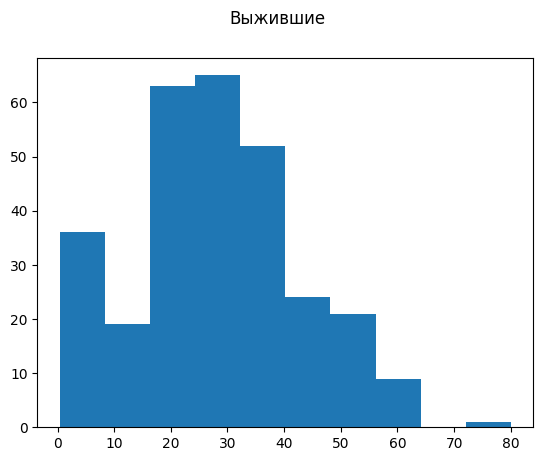

In [256]:
plt.hist(live);
plt.suptitle('Выжившие')

Text(0.5, 0.98, 'Погибшие')

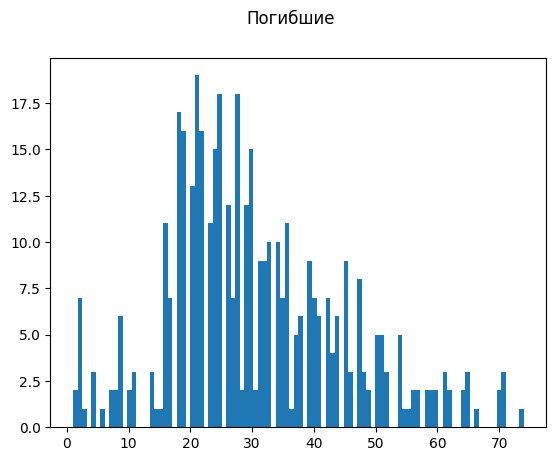

In [257]:
plt.hist(d, bins=100);
plt.suptitle('Погибшие')